<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/AdMiPeQa/File2_DataTable_AdMiPeQa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Datatable library on Health Insurance Marketplace Dataset**

**Group Members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>ADAM WAFII BIN AZUAR</th>
    <th>A20EC0003</th>
  </tr>
  <tr>
    <th>HONG PEI GEOK</th>
    <th>A20EC0044</th>
  </tr>
    <tr>
    <th>MIKHEL ADAM BIN MUHAMMAD EZRIN</th>
    <th>A20EC0237</th>
  </tr>
    <tr>
    <th>QAISARA BINTI ROHZAN</th>
    <th>A20EC0133</th>
  </tr>
</table>

In [ ]:
!pip install datatable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import datatable as dt

In [ ]:
# Pull dataset from my google drive - Mikhel
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1-NS-QGug5kxvTTE1ozW7NTtw3wSHODQj/view?usp=share_link'
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Rate.csv') 

**Tests:**
1. Read file
2. Compute metrics of a column
3. Find unique count of a column
4. Groupby Aggregation
5. Sorting

## **Pandas**

**Read File**

In [ ]:
%%time
df = pd.read_csv('Rate.csv')
df

CPU times: user 34.6 s, sys: 5.67 s, total: 40.2 s
Wall time: 43.5 s


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694440,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2033
12694441,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2034
12694442,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2035
12694443,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2036


In [ ]:
%%time
df.head()

CPU times: user 135 µs, sys: 34 µs, total: 169 µs
Wall time: 175 µs


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16


**Basic Info**

In [ ]:
df.shape

(12694445, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   BusinessYear                               int64  
 1   StateCode                                  object 
 2   IssuerId                                   int64  
 3   SourceName                                 object 
 4   VersionNum                                 int64  
 5   ImportDate                                 object 
 6   IssuerId2                                  int64  
 7   FederalTIN                                 object 
 8   RateEffectiveDate                          object 
 9   RateExpirationDate                         object 
 10  PlanId                                     object 
 11  RatingAreaId                               object 
 12  Tobacco                                    object 
 13  Age                                     

In [ ]:
df.columns[:10]

Index(['BusinessYear', 'StateCode', 'IssuerId', 'SourceName', 'VersionNum',
       'ImportDate', 'IssuerId2', 'FederalTIN', 'RateEffectiveDate',
       'RateExpirationDate'],
      dtype='object')

**Summary Statistics**

In [ ]:
%%time
df['IndividualRate'].mean()

CPU times: user 45.5 ms, sys: 5.59 ms, total: 51 ms
Wall time: 56 ms


4098.026458591218

In [ ]:
%%time
df['IndividualRate'].std()

CPU times: user 143 ms, sys: 3.55 ms, total: 147 ms
Wall time: 148 ms


61222.712586124246

In [ ]:
%%time
df['IssuerId'].nunique()

CPU times: user 79.9 ms, sys: 674 µs, total: 80.6 ms
Wall time: 79.9 ms


910

**GroupBy**

In [ ]:
%%time
gb_pd = df.groupby('IssuerId')['IndividualRate'].mean()

CPU times: user 277 ms, sys: 8.97 ms, total: 286 ms
Wall time: 294 ms


**Sorting the Frame**

In [ ]:
%%time
df.sort_values(by = "VersionNum")

CPU times: user 2.46 s, sys: 23.4 ms, total: 2.48 s
Wall time: 2.5 s


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
1427996,2014,NC,56891,HIOS,1,2013-06-07 09:05:04,56891,56-1018068,2014-01-01,2014-12-31,...,27.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660
9041753,2016,FL,84141,HIOS,1,2015-05-01 02:23:41,84141,36-0883760,2016-01-01,2016-12-31,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8201
9041754,2016,FL,84141,HIOS,1,2015-05-01 02:23:41,84141,36-0883760,2016-01-01,2016-12-31,...,20.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8202
9041755,2016,FL,84141,HIOS,1,2015-05-01 02:23:41,84141,36-0883760,2016-01-01,2016-12-31,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8203
9041756,2016,FL,84141,HIOS,1,2015-05-01 02:23:41,84141,36-0883760,2016-01-01,2016-12-31,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595333,2016,VA,88380,SERFF,24,2015-10-21 17:48:08,88380,54-1356687,2016-10-01,2016-12-31,...,810.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668
12595332,2016,VA,88380,SERFF,24,2015-10-21 17:48:08,88380,54-1356687,2016-04-01,2016-06-30,...,785.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668
12595331,2016,VA,88380,SERFF,24,2015-10-21 17:48:08,88380,54-1356687,2016-07-01,2016-09-30,...,797.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1668
12595353,2016,VA,88380,SERFF,24,2015-10-21 17:48:08,88380,54-1356687,2016-10-01,2016-12-31,...,268.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1672


> **Summary of Pandas**


*   Read File: 43.5 s
*   Head: 175 µs
*   Mean(IndividualRate): 56 ms
*   Sdt(IndividualRate): 148 ms
*   Unique IssuerID: 79.9 ms
*   Groupby Mean: 294 ms
*   Sort: 2.5 s













## **Data Table**

**Read File**

In [ ]:
%%time
dt_df = dt.fread('Rate.csv')
dt_df

CPU times: user 16.4 s, sys: 3.98 s, total: 20.4 s
Wall time: 16.2 s


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,14
1,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,15
4,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,16
5,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,94.5,126.95,126.95,126.95,17
7,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,17
8,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,18


In [ ]:
%%time
dt_df.head()

CPU times: user 1.3 ms, sys: 75 µs, total: 1.38 ms
Wall time: 10.8 ms


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,14
1,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,15
4,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,16
5,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,107.61,144.56,144.56,144.56,16
6,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,94.5,126.95,126.95,126.95,17
7,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,17
8,2014,AK,21989,HIOS,6,2014-03-19T07:06:49,21989,93-0438772,2014-01-01,2014-12-31,…,NA,NA,NA,NA,18


**Basic Info**

In [ ]:
dt_df.shape

(12694445, 24)

In [ ]:
# To get the column names
dt_df.names[:10]

('BusinessYear',
 'StateCode',
 'IssuerId',
 'SourceName',
 'VersionNum',
 'ImportDate',
 'IssuerId2',
 'FederalTIN',
 'RateEffectiveDate',
 'RateExpirationDate')

**Summary Statistics**

In [ ]:
%%time
dt_df['IndividualRate'].mean()

CPU times: user 228 ms, sys: 424 µs, total: 228 ms
Wall time: 125 ms


,IndividualRate
,▪▪▪▪▪▪▪▪
0,4098.03


In [ ]:
%%time
dt_df['IndividualRate'].sd()

CPU times: user 42 µs, sys: 11 µs, total: 53 µs
Wall time: 56.3 µs


,IndividualRate
,▪▪▪▪▪▪▪▪
0,61222.7


In [ ]:
%%time
dt_df['IssuerId'].nunique()

CPU times: user 432 ms, sys: 91.5 ms, total: 523 ms
Wall time: 284 ms


,IssuerId
,▪▪▪▪▪▪▪▪
0,910


**GroupBy**

In [ ]:
%%time
gb_dt = dt_df[:, dt.mean(dt.f.IndividualRate), dt.by(dt.f.IssuerId)]

CPU times: user 470 ms, sys: 9.9 ms, total: 480 ms
Wall time: 279 ms


**Sorting the Frame**

In [ ]:
%%time
dt_df.sort("VersionNum")

CPU times: user 217 ms, sys: 34.1 ms, total: 251 ms
Wall time: 157 ms


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,…,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,14
1,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,15
2,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,16
3,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,17
4,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,18
5,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,19
6,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,20
7,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,21
8,2014,AK,45858,HIOS,1,2013-06-04T08:25:28,45858,47-0098400,2014-01-01,2014-12-31,…,NA,NA,NA,NA,22


> **Summary of Data Table**

*   Read File: 16.2 s
*   Head: 10.8 ms
*   Mean(IndividualRate): 125 ms
*   Sdt(IndividualRate): 56.3 µs
*   Unique IssuerID: 284 ms
*   Groupby Mean: 279 ms
*   Sort: 157 ms




## **Comparisons Between Pandas and Data Table**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tests = ['read', 'head', 'mean', 'std', 'unique', 'groupby', 'sort']
results = pd.DataFrame({'Pandas': [43500, 0.175, 56, 148, 79.9, 294, 2500], 'DataTable': [16200, 10.8, 125, 0.0563, 284, 279, 157]}, index = tests)
results

,Pandas,DataTable
read,43500.000,16200.0000
head,0.175,10.8000
mean,56.000,125.0000
std,148.000,0.0563
unique,79.900,284.0000
groupby,294.000,279.0000
sort,2500.000,157.0000


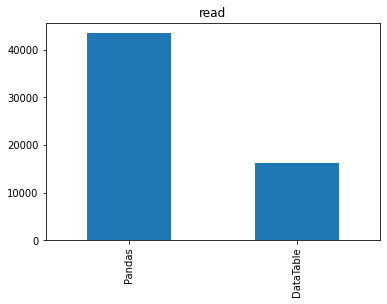

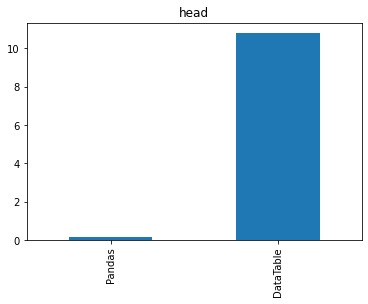

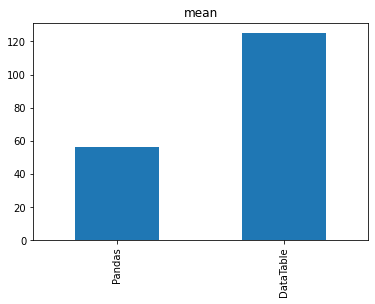

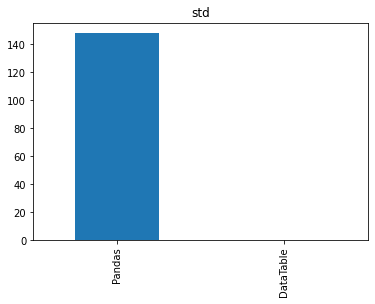

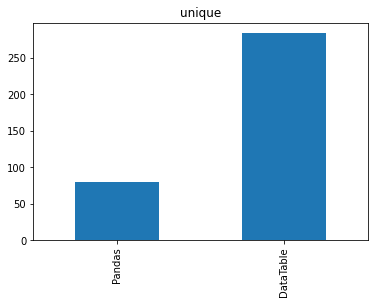

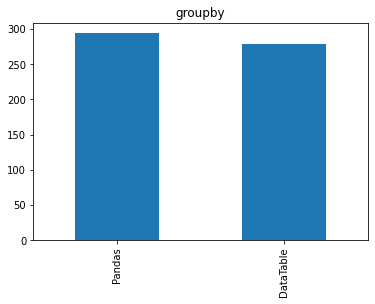

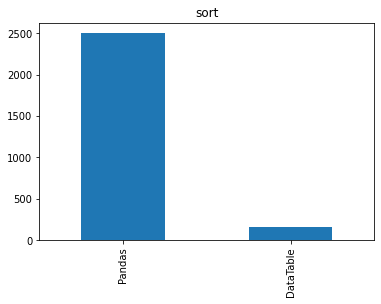

In [ ]:
for test in results.index:
  results.loc[test].plot(kind='bar', title=test)
  plt.show()

Based on the several tests conducted, it can be found that DataTable will have better performance when reading data which is 16.2 s compared to pandas which requires 43.5 s. However, when it came to extract the first five rows from the data, DataTable required 10.8 ms which is much slower than pandas(175 µs). <br><br>
Furthermore, for computing the statistics like mean and standard deviation from the data, pandas requires 56 ms to calculate the mean while DataTable requires 125 ms. Then, 148 ms is used to compute standard deviation for pandas while 56.3 µs is used to compute standard deviation for DataTable. It can be concluded that pandas have better efficiency in calculating the mean of the data while DataTable has better performance in calculating standard deviation. Other than that, pandas take 79.9 ms to find the unique value of a column which is faster than DataTable(284 ms).<br><br>
For both grouping and sorting functions, DataTable has better performance than pandas. It takes 279 ms and 157 ms to group and sort the data respectively. Meanwhile, pandas takes 294 ms and 2.5 s to group and sort the data respectively.
